In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Suppress all warnings
warnings.filterwarnings('ignore')




In [2]:
data = pd.read_csv("insurance.csv")
data.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.')


Shape of the data: (1338, 7)
There are 1338 rows in the data.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
g = data.columns.to_series().groupby(data.dtypes).groups
g

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [8]:
# let's create a dictionary containing various datatypes (Integer, Float and object) and the columns that have this datatype:
dt = {k.name: v for k, v in g.items()}
# Display the columns by different datatypes:
attributes_by_datatype = pd.DataFrame(list(dt.values()), index = dt.keys(), columns = ['Attr 1', 'Attr 2', 'Attr 3'])
attributes_by_datatype

,Attr 1,Attr 2,Attr 3
int64,age,children,None
float64,bmi,charges,None
object,sex,smoker,region


In [9]:
sorted(data['children'].unique())

[0, 1, 2, 3, 4, 5]

In [10]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
#Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

In [14]:
#Let's take a closer look at the Boxplot, and calculate the measure of skewness and totalnumber of outlier values for various attributes through a function:
def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = data.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = data[x].skew()
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Median {x.capitalize()} = {data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')   


5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


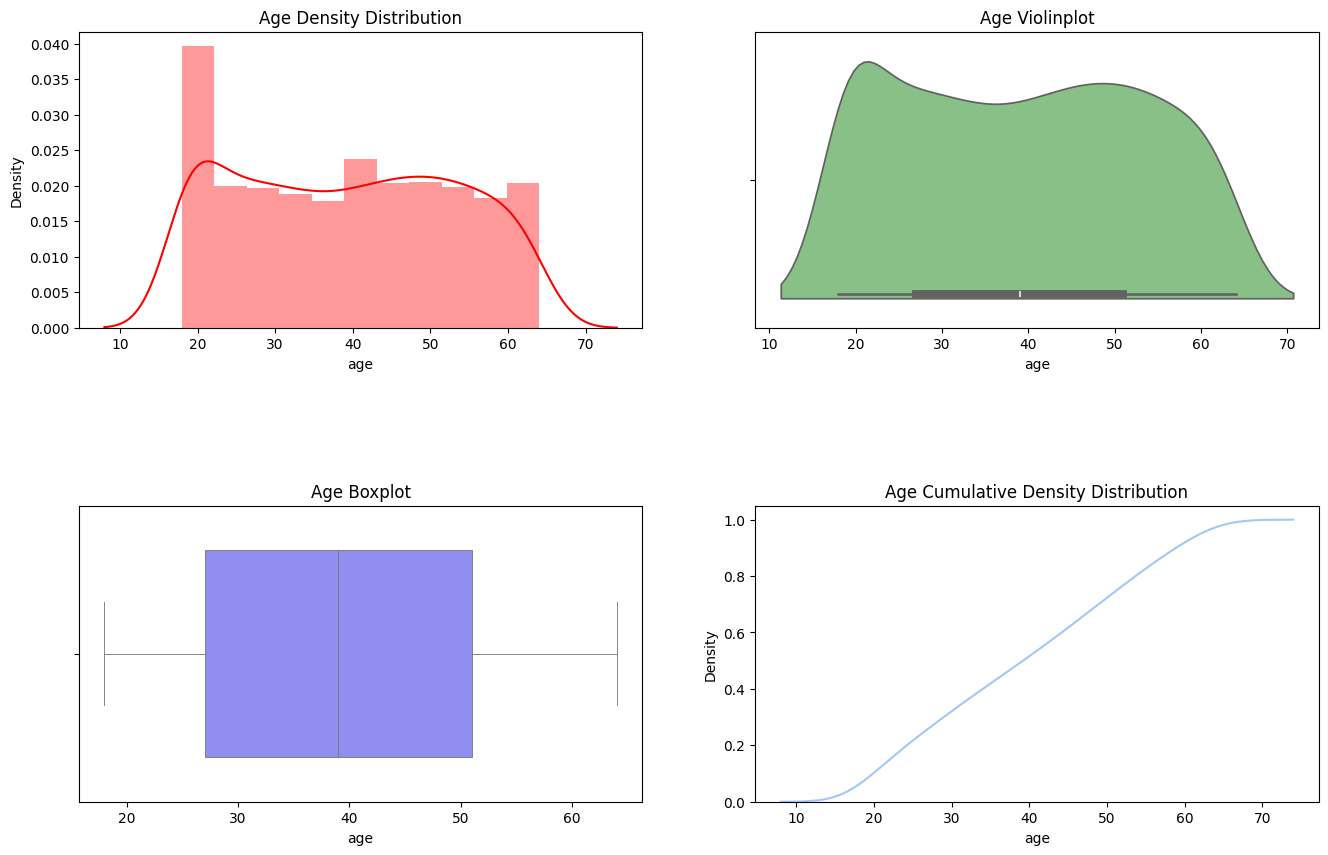

In [15]:
summary('age')
warnings.filterwarnings('ignore')



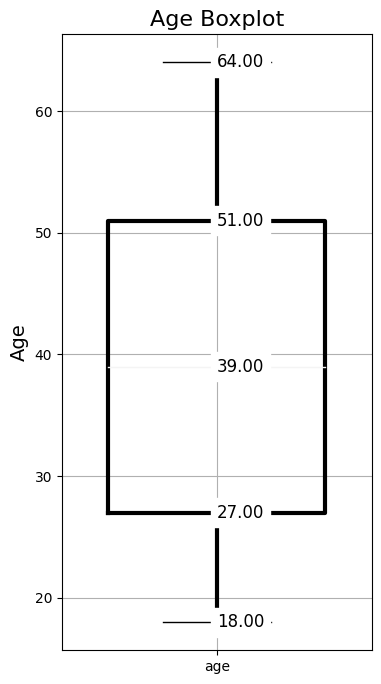

Mean Age = 39.20702541106129
Median Age = 39.0
Skewness of age: 0.05567251565299186.
Total number of outliers in age distribution: 0.


In [16]:
box_plot('age')

In [17]:
# How many of the insured have the age of 64?  
df = data[data['age'] == data['age'].max()]
print(df.head())
print()
print(f'Total number of insured people with the age of 64: {len(df)}.')


     age     sex    bmi  children smoker     region      charges
62    64    male  24.70         1     no  northwest  30166.61817
94    64  female  31.30         2    yes  southwest  47291.05500
199   64  female  39.33         0     no  northeast  14901.51670
328   64  female  33.80         1    yes  southwest  47928.03000
335   64    male  34.50         0     no  southwest  13822.80300

Total number of insured people with the age of 64: 22.


5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


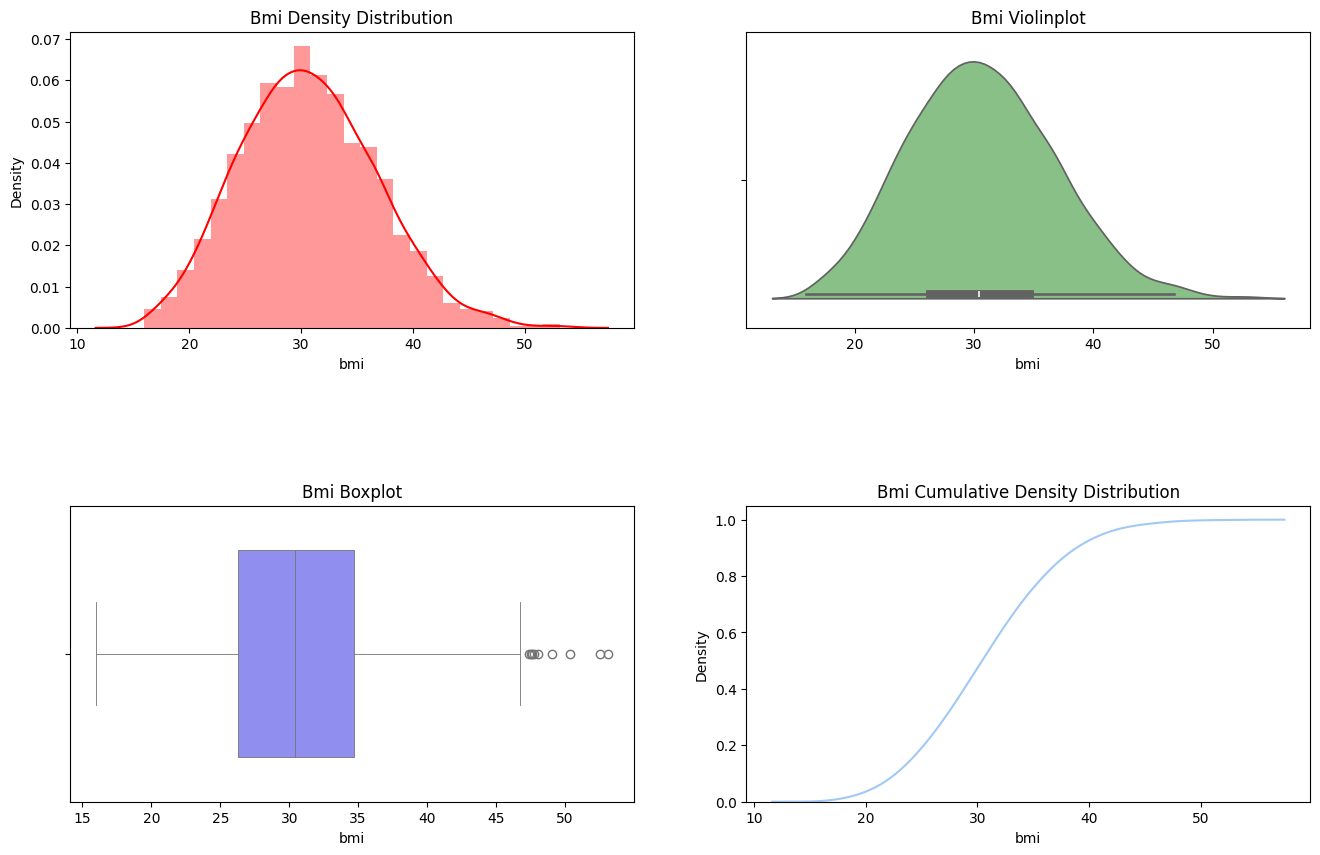

In [18]:
summary('bmi')

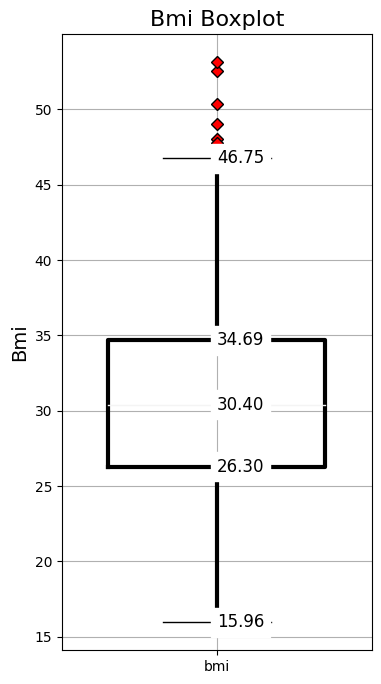

Mean Bmi = 30.66339686098655
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


In [19]:
box_plot('bmi')

In [20]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]


,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [21]:
data['charges'].mean(), data['charges'].median()


(13270.422265141257, 9382.033)

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


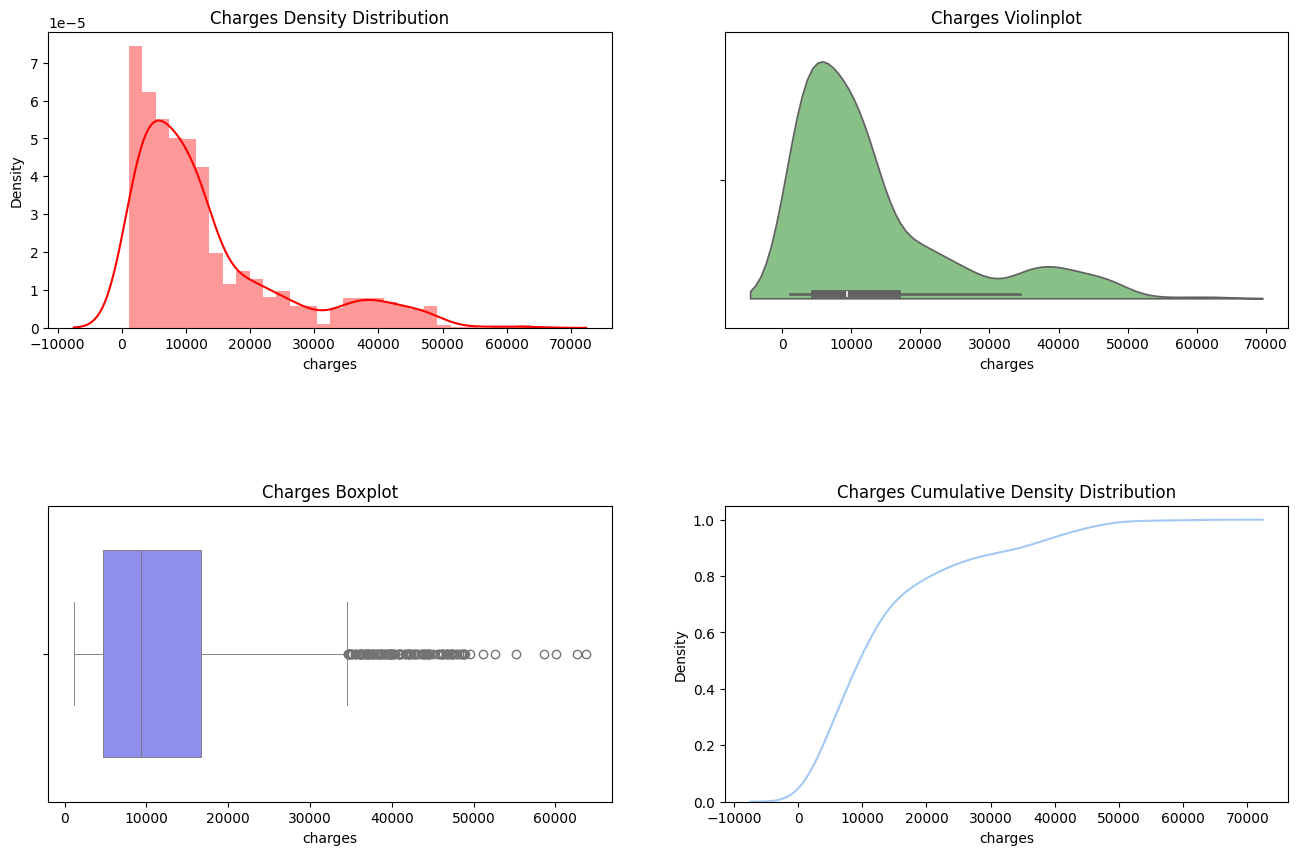

In [22]:
summary('charges')

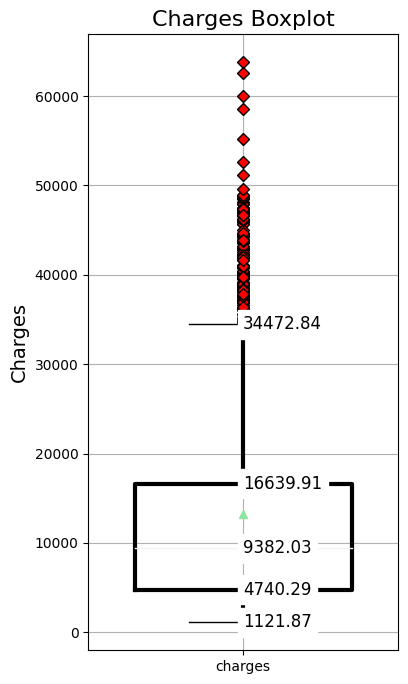

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [23]:
box_plot('charges')

In [24]:
# Who is paying the highest charges?
data[data['charges'] == data['charges'].max()]


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [25]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]


,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [26]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

In [27]:
# Create a function that returns a Pie chart for categorical variable:
def pie_chart(x = 'smoker'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()


<Axes: xlabel='sex', ylabel='count'>

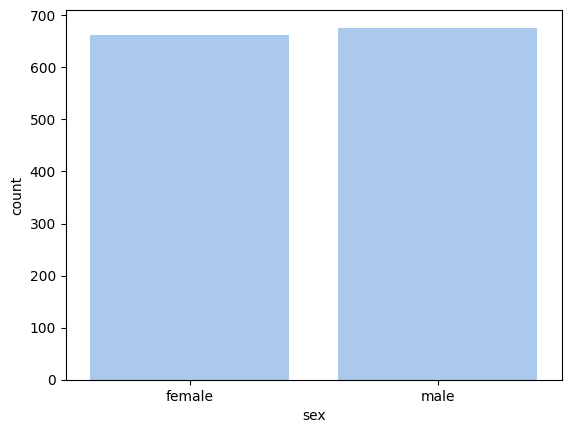

In [28]:
sns.countplot(x = 'sex', data = data)

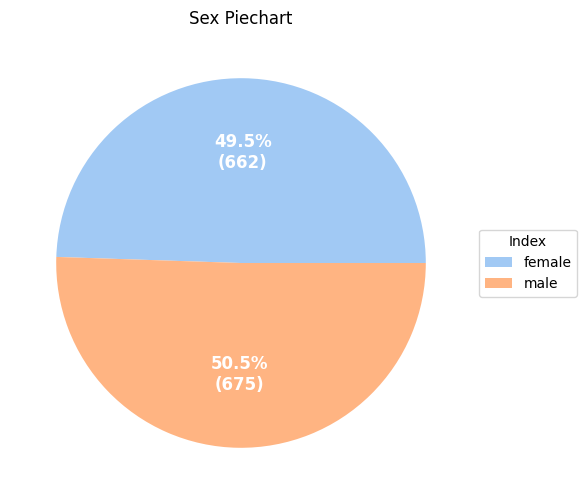

In [29]:
pie_chart('sex')


<Axes: xlabel='smoker', ylabel='count'>

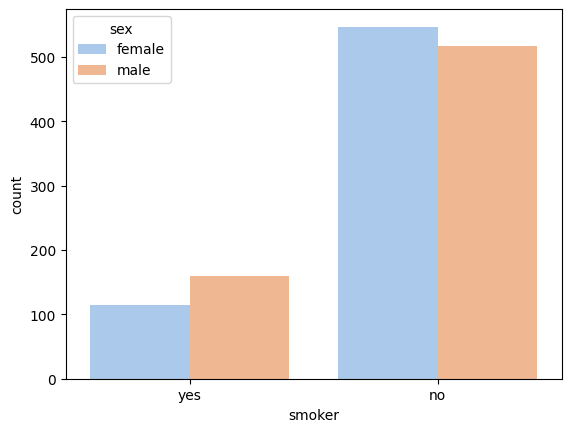

In [30]:
sns.countplot(x = 'smoker', hue = 'sex', data = data)

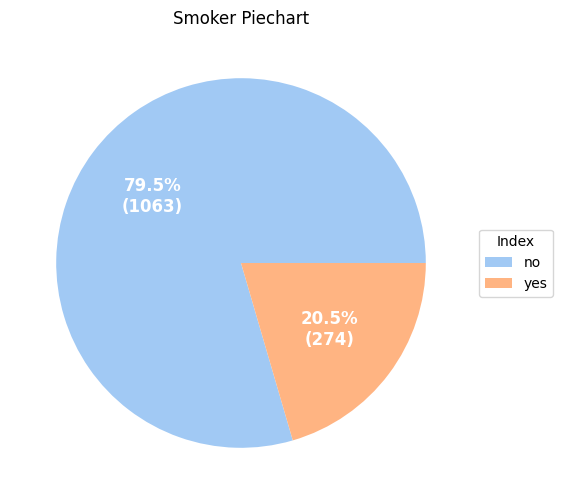

In [31]:
pie_chart('smoker')

In [32]:
# Are average premium charges for smokers significantly higher than non-smokers?
data['charges'].groupby(data['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [33]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

<Axes: xlabel='smoker', ylabel='charges'>

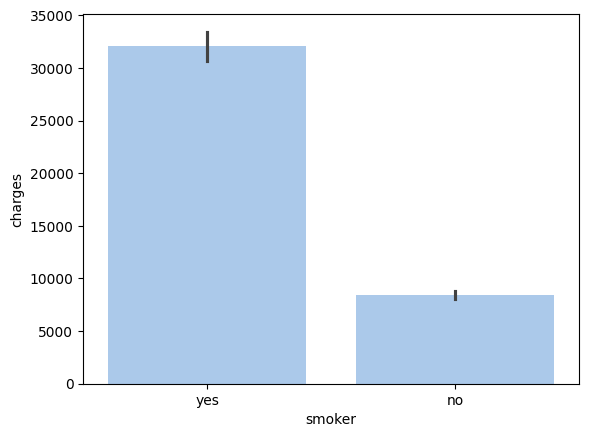

In [34]:
# yes, average premium charges for smokers are indeed significantly higher than non-smokers.
sns.barplot(x = "smoker", y = "charges", data = data)


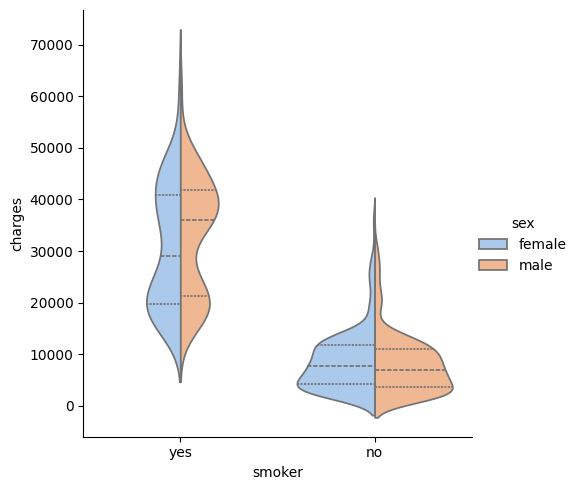

In [35]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data);

In [36]:
data.groupby(['smoker', 'sex']).agg('count')['age']


smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

<Axes: xlabel='region', ylabel='count'>

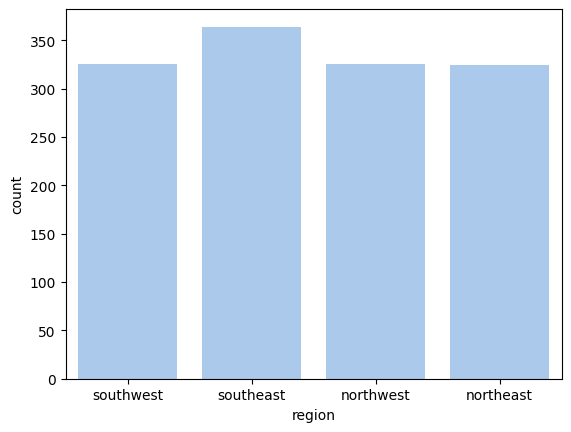

In [37]:
sns.countplot(x = 'region', data = data)

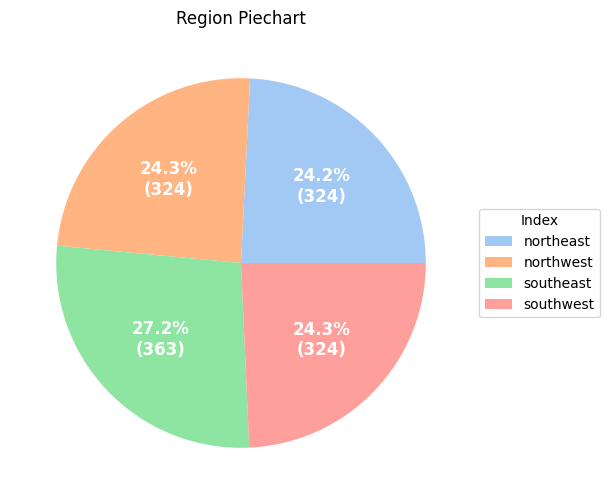

In [38]:
pie_chart('region')

<Axes: xlabel='children', ylabel='count'>

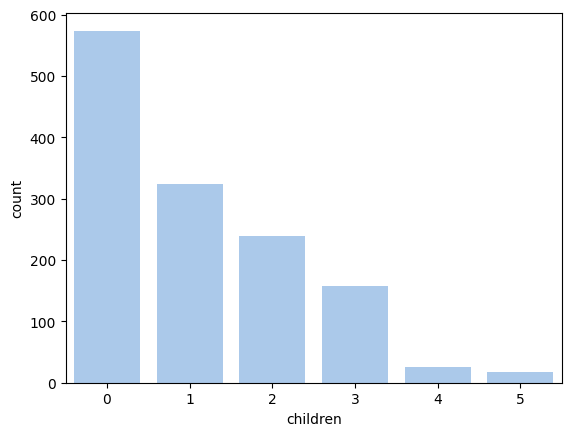

In [39]:
sns.countplot(x = 'children', data = data)

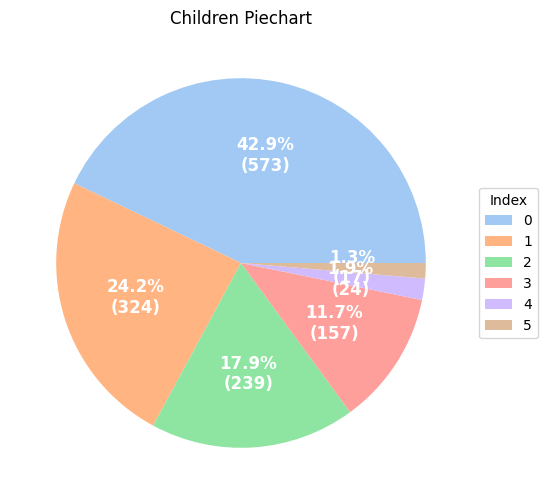

In [40]:
pie_chart('children')

In [41]:
data.groupby(['children']).agg('count')['age']


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: age, dtype: int64

In [42]:
for x in ['sex', 'children', 'smoker', 'region']:
    data[x] = data[x].astype('category')

data.dtypes 

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [43]:
type(data.dtypes)

pandas.core.series.Series

In [44]:
# Next, we select all columns of the dataFrame with datatype = category:
cat_columns = data.select_dtypes(['category']).columns
cat_columns


Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [45]:
# Finally, we transform the original columns by replacing the elements with their category codes:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


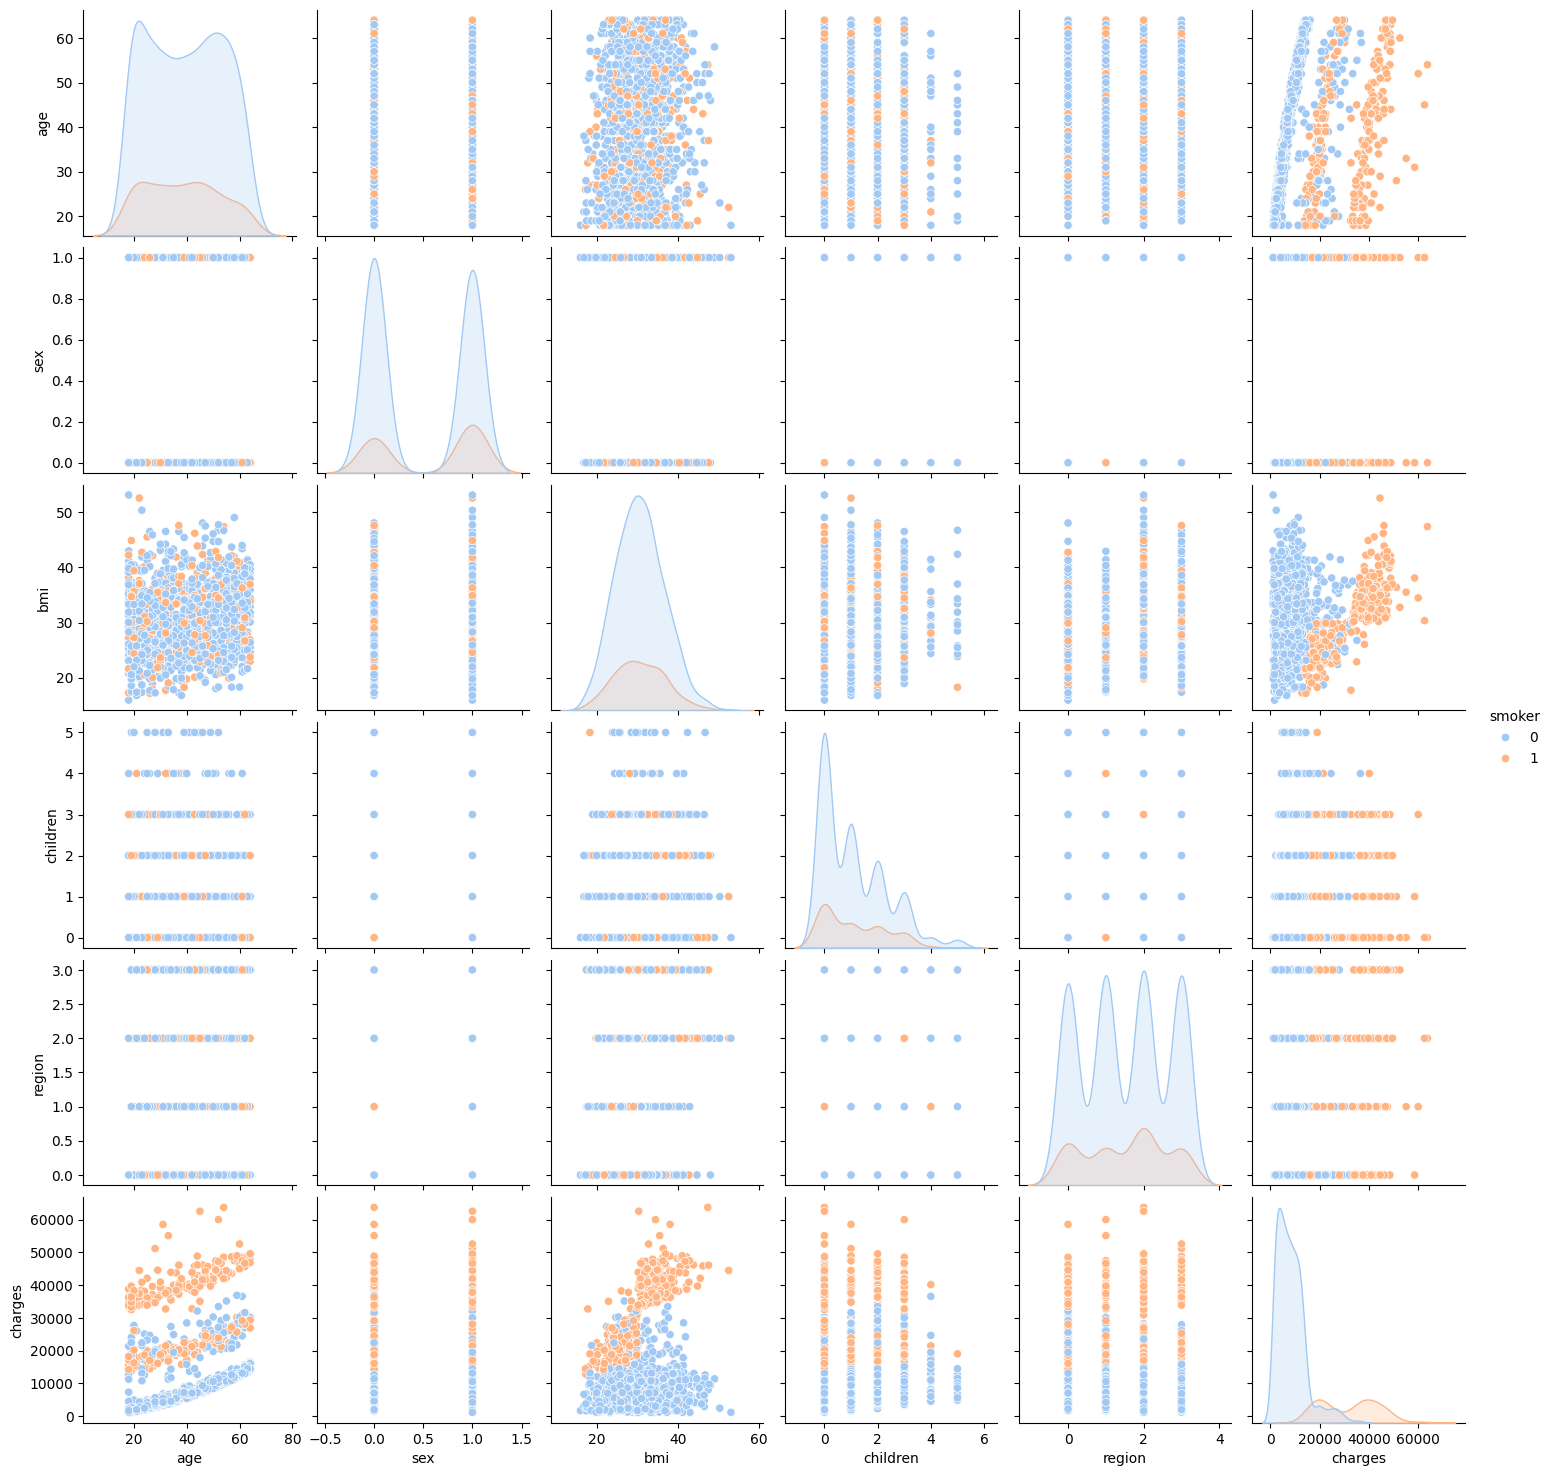

In [46]:
# Now we can plot all columns of our dataset in a pairplot!
sns.pairplot(data, hue  = 'smoker')


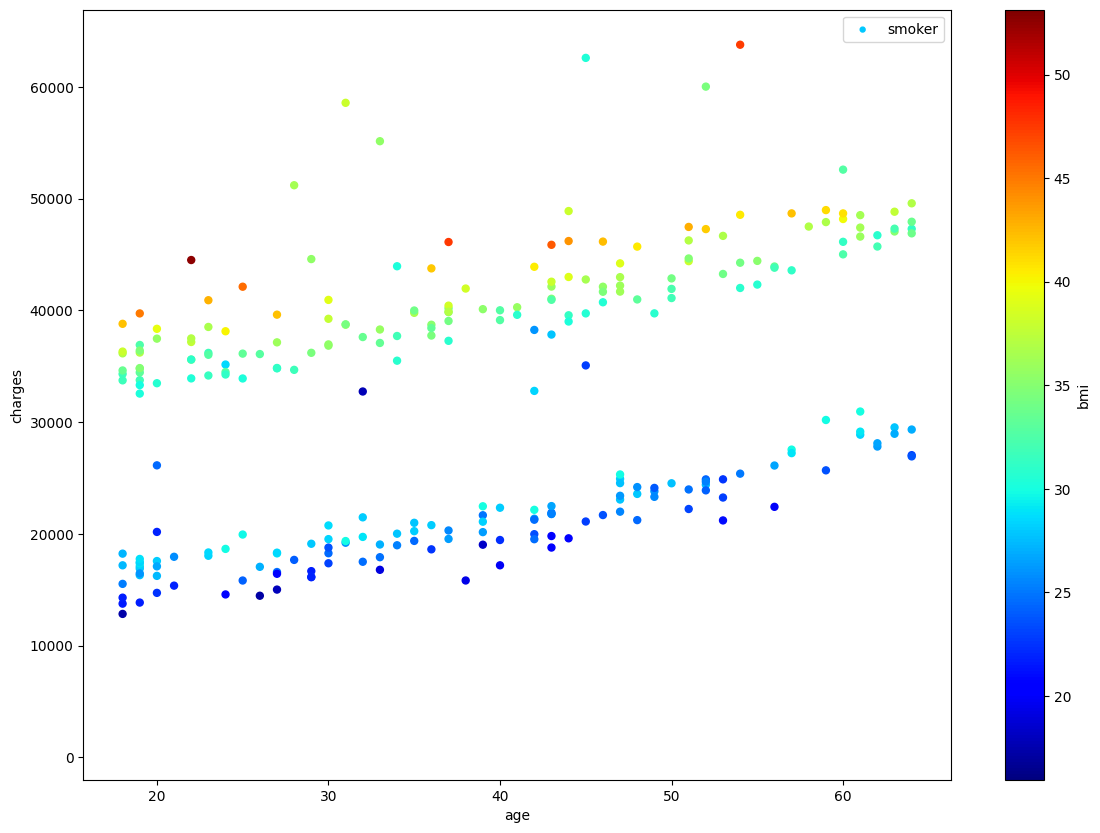

In [47]:
data.plot(kind="scatter", x="age", y="charges", 
    s=data["smoker"]*25, label="smoker", figsize=(14,10),
    c='bmi', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


<Axes: >

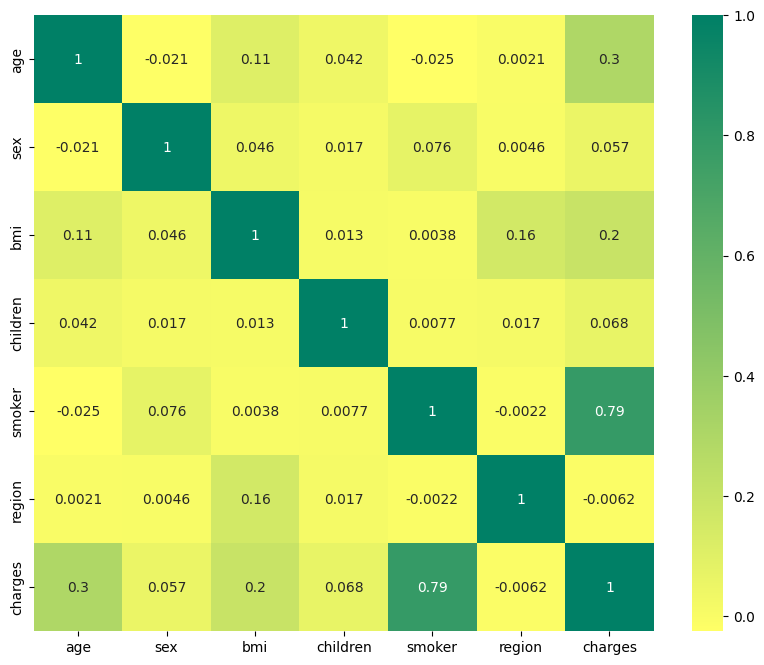

In [48]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')
